DiGraph with 353 nodes and 400 edges


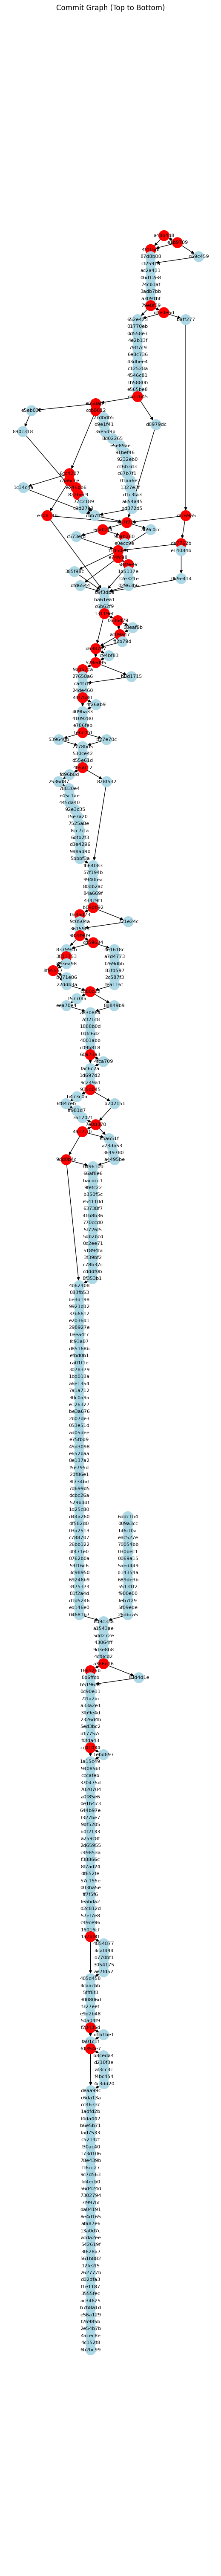

In [ ]:
import git
import networkx as nx
import matplotlib.pyplot as plt


def save_graph(file_path, graph):
    with open(file_path, 'wb') as f:
        nx.write_edgelist(graph, f, data=False)


def show_graph(graph):
    plt.figure(figsize=(5, 60))

    pos = nx.nx_pydot.pydot_layout(graph, prog='dot')
    labels = {node: node[:7] for node in graph.nodes}
    nodeColors = [
        "red" if len(graph[node]) > 1 else "lightblue" 
        for node in graph.nodes
    ]

    nx.draw(graph, pos, labels=labels, font_size=8, node_color= nodeColors)


    plt.title("Commit Graph (Top to Bottom)")
    plt.show()


def process_repository(repo_path, output_path):
    repo = git.Repo(repo_path)
    
    g = {}

    for commit in repo.iter_commits('--all'):
        commit_hash = str(commit)
        parents = [str(parent) for parent in commit.parents]

        if commit_hash not in g:
            g[commit_hash] = set()
        g[commit_hash].update(parents)

    graph = nx.DiGraph(g)


    print(graph)
    show_graph(graph)

    #save_graph(output_path, graph)


# https://github.com/Sycnex/Windows10Debloater/commits/master/?before=a48b4d8dc501680e0edc31f840791c966d89d309+35
process_repository("C:/Users/Gerome/Desktop/graphes-git/dossiers_git/Windows10Debloater", "C:/Users/Gerome/Desktop/graphes-git")